We learned that there are two types of data visualization:

* Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
* Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout, we focused on explanatory data visualization and learned the following:

* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to create visual patterns using Gestalt principles.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In this project, we'll combine these skills.

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, we get 1.5 US dollars if we pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

Let's start by reading in the dataset. While we do this, start thinking about what data visualizations we might want to build using this data. We can find the solution notebook for this project [here](https://github.com/dataquestio/solutions/blob/master/Mission529Solutions.ipynb).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [4]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [5]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [6]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Before we start creating data visualizations, we'll need to do a bit of data cleaning.Our focus in the project will be on the exchange rate between the euro and the American dollar. 

If we want to explore a different currency after finishing this project, the code we use for cleaning will come in handy.

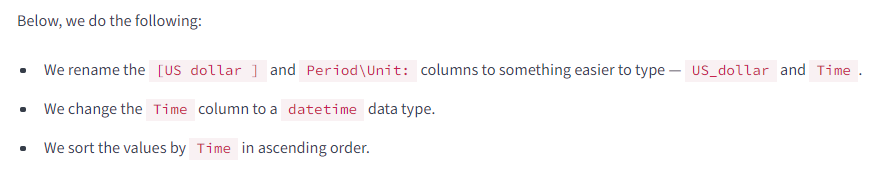

In [7]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'}, inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

exchange_rates.sort_values('Time', ignore_index=True,inplace=True)

**Task**

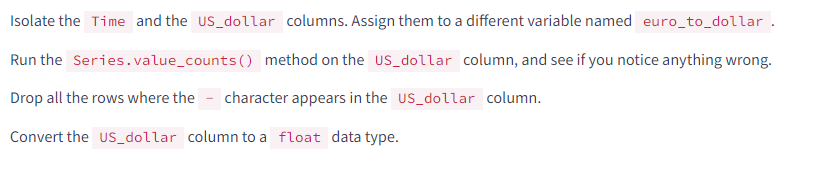

**Answer**

In [8]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.5068     1
1.5687     1
1.3732     1
1.1872     1
1.2702     1
Name: US_dollar, Length: 3528, dtype: int64

In [9]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

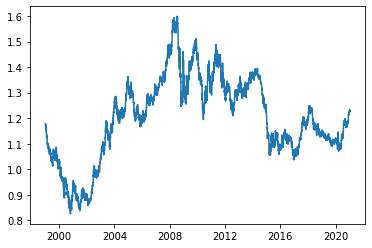

In [10]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the **rolling mean** (also known as the **moving average**).

To understand how a rolling mean works, let's say we have ten values for ten consecutive days.

In [11]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


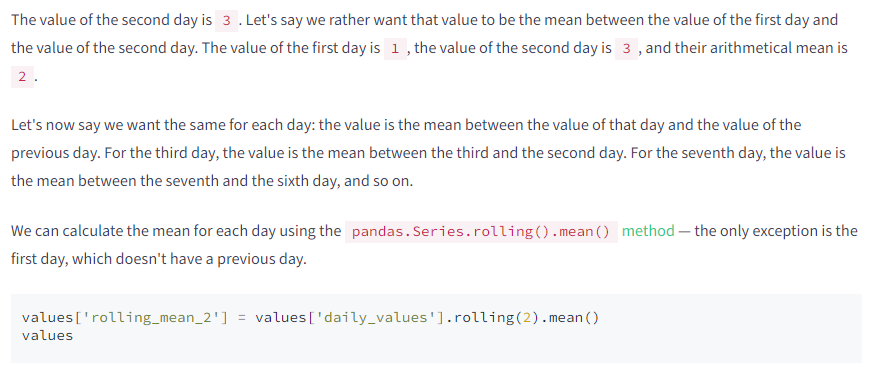

In [12]:
values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values

,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


We calculated the rolling mean using values from two days — the current day and the previous day. We call the number of days used in the calculation the **rolling window** (or moving window). If the rolling window is three, then we calculate the mean between the value of the current day and the values of the previous two days.

In [13]:
values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


The rolling window can take various values — some common values include seven (one week), 30 (one month), 50 or 100 days, or 365 days (one year).

Below, we see how our line plot changes visually as we increase the rolling window. The window gets larger, and the line becomes smoother. This increases the data-ink ratio, and it can be useful if we want the audience to focus only on long-term trends.

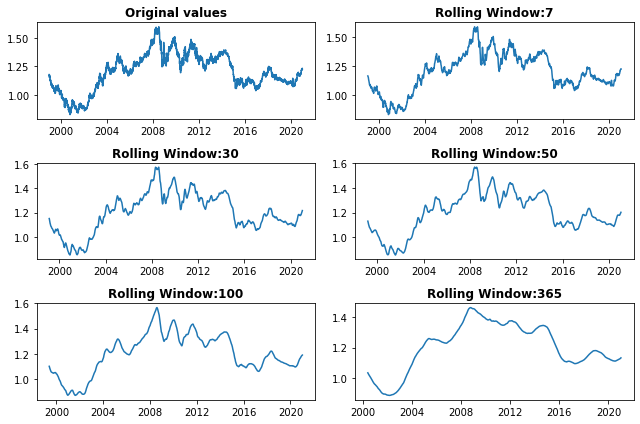

In [14]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],[7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

**Task**

Calculate the rolling means for the `US_dollar` column using a moving window of 30 days. Add the rolling means to a new column named `rolling_mean`.

**Answer**

In [15]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

We're going to spend some time coming up with an idea for the graph we want to build. Our goal is to create a storytelling data visualization using the data we have.

To create a story, remember that we need to arrange our data into a series of events that show change.

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

### Financial Crisis Example

In [16]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]

financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

These are just a few ideas — we should think of a story angle that we find interesting.

Don't become frustrated if we don't have an idea — creativity is unpredictable. Sometimes we can have ten ideas in a minute, and sometimes we won't have any ideas in a week.

If we don't have any ideas, we can choose one from the examples above. What is important here is to spend at least a few minutes brainstorming graph ideas.

Now that we know what story we want to tell, we're going to think more about how the graph is going to look.

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify our work, we can choose any audience we want for our graph.

Next, we're going to sketch the graph — we do this before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

* Maximize the data-ink ratio.
* Create visual patterns using Gestalt principles.
* Guide the audience's attention using pre-attentive attributes.

These design principles can help us in two ways:

* They generate design options.
* They help us choose among those options.

We advise using pen and paper to sketch the graph because it gives more flexibility. Alternatively, we can make the sketch using a graphics editor.

This is another step that relies on creativity, so we're going to say it again: creativity is unpredictable, so don't become frustrated. If we don't come up with an idea, we have a few suggestions.

Now that we have a good idea of the story we want to tell and how it's going to look, we'll start coding.

Writing the code may feel intimidating. However, we don't have to create the best graph in the world. The point here is to get better at building something ourself.

Here are a few tips on how to approach this:

* If we don't remember something we've already learned (a common issue when we're learning), read that part of the lesson again.
* Google any Matplotlib issue we may have. For better results, start our queries with the word "matplotlib":
    * "matplotlib how to remove tick labels"
    * "matplotlib how to remove only the right and the top axes"
* Don't hesitate to read Matplotlib documentation or look through their examples gallery.
* Matplotlib doesn't have a function for everything — try to improvise by separately creating the constituent parts of what we want to build.
* Where there is code, there will be errors — google any errors we can't fix.

In [20]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))


ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
# ax.axvspan(xmin=13950, xmax=14140, ymin=0.09,
#            alpha=0.3, color='grey')

xmin = pd.to_datetime("2008-04", format = "%Y-%m")
xmax = pd.to_datetime("2008-09", format = "%Y-%m")

ax.axvspan(xmin=xmin,xmax=xmax, ymin=0.09,alpha=0.3, color='grey')

### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13110
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13020, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

### Adding a title and a subtitle    
ax.text(13020, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(13020, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(13, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

ValueError: Image size of 229148x271 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x216 with 1 Axes>

### The Three US Presidencies Example

In [18]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]

bush = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

Below, we'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots:

* We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
* We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
* The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

In [19]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(12300, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(12000, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(14950, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(17560, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(10800, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(10800, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(10700, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

ValueError: Image size of 99247x523 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x432 with 4 Axes>

In this project, we created a storytelling data visualization using the following workflow:

* We started by exploring and cleaning the data.
* We brainstormed ideas for storytelling data visualizations and chose one.
* We sketched our data visualization using pen and paper.
* We coded the sketched data visualization.

Next steps include the following:

* Creating a graph for a different currency.
* Creating a graph for multiple currencies — perhaps you can compare their evolution.

100
[6. 4.]
Which should result in a 600 x 400 Image
[65.  8.]


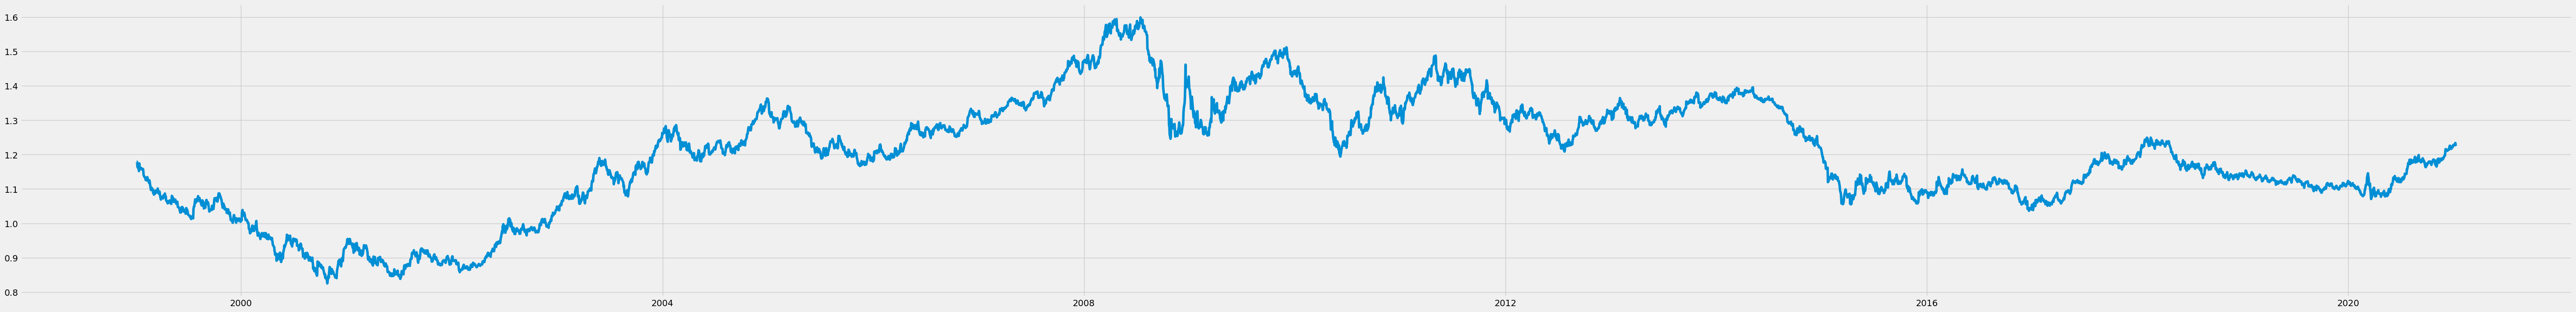

In [106]:
plt.figure(dpi= 100)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
F = plt.gcf()
DPI = F.get_dpi()
print(DPI)
DefaultSize = F.get_size_inches()
print(DefaultSize)
print ("Which should result in a %i x %i Image"%(DPI*DefaultSize[0], DPI*DefaultSize[1]))
F.set_size_inches( (65, DefaultSize[1]*2) )
Size = F.get_size_inches()
print(Size)
plt.show()